<a href="https://colab.research.google.com/github/ele9996/NetworkDynamicsAndLearningLabs/blob/main/HMW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import random
np.random.seed(666)

In [79]:
#plottare anche i new infected per week
#vedere se riesco a far partire la simulazione da un po' prima (Facoltativo)


#Problem 1

##1.1

Plot the graph and variables definition

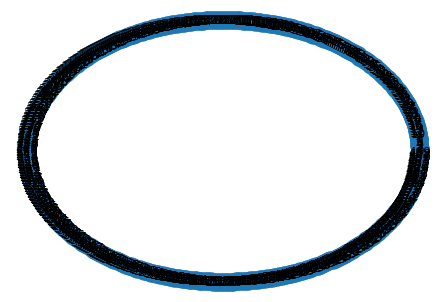

In [80]:

nodes=500
k=4


G = nx.Graph()
nx.add_cycle(G, range(nodes))
for n in range(nodes):
    other = n+3
    if other>=nodes:
        other-=nodes
    G.add_edge(other,n)

nx.draw_circular(G, with_labels=True)




In [81]:
#Array and variables definition

beta=0.3
ro=0.7
weeks=15
N=100


#array containing the total infected people each week for all simulations 
tot_inf = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total new infected people each week for all simulations 
tot_new_infected = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total recovered people each week for all simulations 
tot_recovered = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total subsceptible people each week for all simulations 
tot_subsceptible = np.array([[500.,500,500,500,500,500,500,500,500,500,500,500,500,500,500]])

In [82]:
#simulation of epidemics

def MySim(weeks, nodes,n_status,n_infected,n_subsceptible,n_recovered,n_new_infected): 
  
  n_status_next=np.copy(n_status)
  #print("initial_n_status_next=n_staus: {}".format(n_status_next))
  
  for i in range(weeks):
    #print("settimana {}".format(i))
    new_inf=0

    for node in range(nodes):
      #print("node:{}".format(node))
      m=0
      

      #find infected neighbors number(m)--> se non è già lui infetto
      for neigh in G.neighbors(node):
        if n_status[neigh]==1:
          m+=1
      #print("m={}".format(m))
      
      #with the following if chain I see if my node can change status
      random_prob=random.random()
      #print("random probability={}".format(random_prob))
      #print("known prob: {}".format((1-beta)**m))
      
      if n_status[node]==0:
        if random_prob > (1-beta)**m:
          n_status_next[node]=1  
          new_inf +=1
        #print("status_next={}".format(n_status_next))
        #print("status={}".format(n_status))
      
      if n_status[node]==1:
        if random_prob<ro:
          n_status_next[node]=2

    #print(n_status)
    #print(n_status_next)
    infected=np.count_nonzero(n_status_next==1)
    recovered=np.count_nonzero(n_status_next==2)
    subsceptible=np.count_nonzero(n_status_next==0)

    #print("old infected number in the week: {}".format(infected_old))
    #print("infected number in the week: {}".format(infected))
    n_infected[i]=infected
    n_recovered[i]=recovered
    n_subsceptible[i]=subsceptible
    n_new_infected[i]=new_inf
    
    n_status=np.copy(n_status_next)
  #print("fine")
  #print("final infected array for every week:{}".format(n_infected))
  return n_infected,n_recovered,n_subsceptible,n_new_infected




In [83]:
#main loop

for n in range(N):
  #print("inizio simulazione {}".format(n))
  #n status contains the status of each node
  #status are defined as {0:'S', 1:'I', 2:'R'}
  n_status=np.zeros(nodes)
  
  #array containing the number of infected people each week in one simulation of 100
  n_infected=np.zeros(weeks)

  #array containing the number of recoverd people each week in one simulation of 100
  n_recovered=np.zeros(weeks)

  #array containing the number of subsceptible people each week in one simulation of 100
  n_subsceptible=np.zeros(weeks)

  #array containing the number of new infected people each week in one simulation of 100
  n_new_infected=np.zeros(weeks)
  
  #I randomly search for 10 nodes which will start as infected
  random_index=random.sample(range(0,nodes-1),10)
  #print("the nodes I selected to be infected are: {}".format(random_index))

  for index in random_index:
    n_status[index]=1

  #I run the simulation
  n_infected,n_recovered,n_subsceptible,n_new_infected=MySim(weeks,nodes,n_status,n_infected,n_subsceptible,n_recovered,n_new_infected)
  
  #print(n_subsceptible)
  tot_inf=np.concatenate((tot_inf, [n_infected]), axis = 0)
  tot_recovered=np.concatenate((tot_recovered, [n_recovered]), axis = 0)
  tot_subsceptible=np.concatenate((tot_subsceptible, [n_subsceptible]), axis = 0)
  tot_new_infected=np.concatenate((tot_new_infected, [n_new_infected]), axis = 0)

#print("totale infettati per ogni settimana per simulazione:{}".format(tot_inf))

avg_inf=np.average(tot_inf,axis=0)
avg_recovered=np.average(tot_recovered,axis=0)
avg_subsceptible=np.average(tot_subsceptible,axis=0)
avg_new_infected=np.average(tot_new_infected,axis=0)

#print("Average number of infected people per week={}".format(avg_subsceptible))

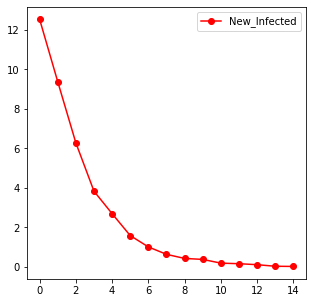

In [84]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(avg_new_infected,'ro-', label="New_Infected")



ax.legend()
plt.show()

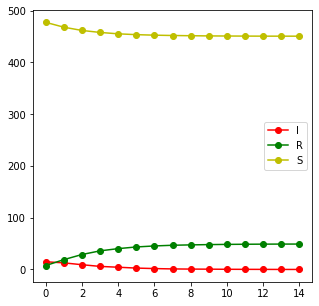

In [85]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(avg_inf,'ro-', label="I",)
ax.plot(avg_recovered,'go-', label="R")
ax.plot(avg_subsceptible,'yo-', label="S")

ax.legend()
plt.show()



##1.2

In [86]:
def my_rand_graph(k,nodes_number):

  c=np.zeros(nodes_number,dtype=int)
  GPA = nx.complete_graph(k + 1)
  sum_degr=0


  for node in range(nodes_number):
    c[node]=k/2


  if k % 2 != 0:
    c[::2] += 1

  for i in range(k + 1, nodes_number):
    w = np.zeros(i, dtype=int)
    
    for n in GPA.nodes:
      w[n] = GPA.degree(n)

    neighbors = np.random.choice(GPA.nodes, size=c[i], replace=False, p=w/np.sum(w))
    
    for neig in neighbors:
      GPA.add_edge(i, neig)

  for no in range(nodes_number):
    sum_degr+=GPA.degree(no)
  
  avg_degree=sum_degr/len(GPA)
  
  return GPA, avg_degree



In [87]:
nodes_number=1000
k=2

G,avg_degree=my_rand_graph(k,nodes_number)


print("Graph Average degree: {}".format(avg_degree))  

Graph Average degree: 2.0


#Problem 2

In [88]:
nodes=500
k=6
beta=0.3
ro=0.7
weeks=15
N=100


G,avg_degree=my_rand_graph(k,nodes)

print("avg_degree:{}".format(avg_degree))



avg_degree:6.0


In [89]:

#array containing the total infected people each week for all simulations 
tot_inf = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total recovered people each week for all simulations 
tot_recovered = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total subsceptible people each week for all simulations 
tot_subsceptible = np.array([[500.,500,500,500,500,500,500,500,500,500,500,500,500,500,500]])

#array containing the total new infected people each week for all simulations 
tot_new_infected = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])



#main loop

for n in range(N):
  #print("inizio simulazione {}".format(n))
  #n status contains the status of each node
  #status are defined as {0:'S', 1:'I', 2:'R'}
  n_status=np.zeros(nodes)
  
  #array containing the number of infected people each week in one simulation of 100
  n_infected=np.zeros(weeks)

  #array containing the number of recoverd people each week in one simulation of 100
  n_recovered=np.zeros(weeks)

  #array containing the number of subsceptible people each week in one simulation of 100
  n_subsceptible=np.zeros(weeks)

  #array containing the number of new infected people each week in one simulation of 100
  n_new_infected=np.zeros(weeks)
  
  #I randomly search for 10 nodes which will start as infected
  random_index=random.sample(range(0,nodes-1),10)
  #print("the nodes I selected to be infected are: {}".format(random_index))

  for index in random_index:
    n_status[index]=1

  #I run the simulation
  n_infected,n_recovered,n_subsceptible,n_new_infected=MySim(weeks,nodes,n_status,n_infected,n_subsceptible,n_recovered,n_new_infected)
  
  #print(n_subsceptible)
  tot_inf=np.concatenate((tot_inf, [n_infected]), axis = 0)
  tot_recovered=np.concatenate((tot_recovered, [n_recovered]), axis = 0)
  tot_subsceptible=np.concatenate((tot_subsceptible, [n_subsceptible]), axis = 0)
  tot_new_infected=np.concatenate((tot_new_infected, [n_new_infected]), axis = 0)
   

#print("totale infettati per ogni settimana per simulazione:{}".format(tot_inf))

avg_inf=np.average(tot_inf,axis=0)
avg_recovered=np.average(tot_recovered,axis=0)
avg_subsceptible=np.average(tot_subsceptible,axis=0)
avg_new_infected=np.average(tot_new_infected,axis=0)

print("Average number of infected people per week={}".format(avg_subsceptible))

Average number of infected people per week=[402.34653465 309.85148515 252.96039604 222.52475248 207.28712871
 199.66336634 195.99009901 194.42574257 193.33663366 192.81188119
 192.55445545 192.46534653 192.41584158 192.35643564 192.32673267]


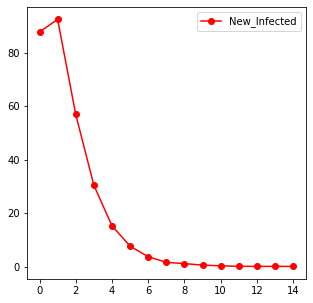

In [90]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(avg_new_infected,'ro-', label="New_Infected")



ax.legend()
plt.show()

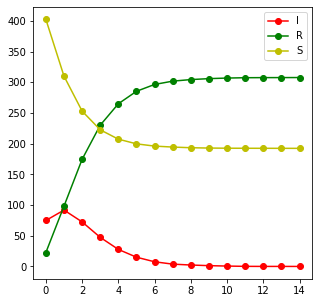

In [91]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(avg_inf,'ro-', label="I",)
ax.plot(avg_recovered,'go-', label="R")
ax.plot(avg_subsceptible,'yo-', label="S")


ax.legend()
plt.show()

#Exercise 3

In [92]:
vacc=[0,5,15,25,35,45,55,60,60,60,60,60,60,60,60]


In [93]:
#simulation of epidemics
#status are defined as {0:'S', 1:'I', 2:'R',3:'V'}

def MySimVaccine(weeks, nodes,n_status,n_infected,n_subsceptible,n_recovered,n_vaccinated,n_new_infected,n_new_vaccinated): 

  n_status_next=np.copy(n_status)
  #n_status_next=n_status
  #print("initial_n_status_next=n_staus: {}".format(n_status_next))
  
  for i in range(weeks):
    new_inf=0
    new_vax=0
    #print("settimana {}".format(i))
    #understand how many people vaccine
    perc=vacc[i]-vacc[i-1]

    tot_people=(perc*(nodes))/100
    #print("tot people:{}".format(tot_people))
    
    if i==0:
      tot_people=0
    sequence=np.append(np.where(n_status==0),np.where(n_status==1))
    sequence=np.append(sequence,np.where(n_status==2))
    #print("seq:{}".format(sequence))
    new_rand_indexes=np.random.choice(sequence, int(tot_people),replace=False)

    for index in new_rand_indexes:
      n_status[index]=3
      new_vax+=1

    
    
    n_status_next=np.copy(n_status)
    #n_status_next=n_status
    #print(n_status_next)

    for node in range(nodes):
      #print("node:{}".format(node))
      m=0
      

      #find infected neighbors number(m)--> se non è già lui infetto
      for neigh in G.neighbors(node):
        if n_status[neigh]==1:
          m+=1
      #print("m={}".format(m))
      
      #with the following if chain I see if my node can change status
      random_prob=random.random()
      #print("random probability={}".format(random_prob))
      #print("known prob: {}".format((1-beta)**m))
      
      if n_status[node]==0:
        if random_prob > (1-beta)**m:
          n_status_next[node]=1  
          new_inf+=1
        #print("status_next={}".format(n_status_next))
        #print("status={}".format(n_status))
      
      if n_status[node]==1:
        if random_prob<ro:
          n_status_next[node]=2


    

    infected=np.count_nonzero(n_status_next==1)
    recovered=np.count_nonzero(n_status_next==2)
    subsceptible=np.count_nonzero(n_status_next==0)
    vaccinated=np.count_nonzero(n_status_next==3)

    #print("infected number in the week: {}".format(infected))
    n_infected[i]=infected
    n_recovered[i]=recovered
    n_subsceptible[i]=subsceptible
    n_vaccinated[i]=vaccinated
    n_new_infected[i]=new_inf
    n_new_vaccinated[i]=new_vax
    #n_status=n_status_next
    n_status=np.copy(n_status_next)
  #print("fine")
  #print("final infected array for every week:{}".format(n_infected))
  return n_infected,n_recovered,n_subsceptible,n_vaccinated,n_new_infected,n_new_vaccinated

In [94]:

#array containing the total infected people each week for all simulations 
tot_inf = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total recovered people each week for all simulations 
tot_recovered = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total vaccinated people each week for all simulations 
tot_vaccinated = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total subsceptible people each week for all simulations 
tot_subsceptible = np.array([[490,490,490,490,490,490,490,490,490,490,490,490,490,490,490]])

#array containing the total new infected people each week for all simulations 
tot_new_infected = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#array containing the total new infected people each week for all simulations 
tot_new_vaccinated = np.array([[0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]])

#main loop

for n in range(N):
  #print("inizio simulazione {}".format(n))
  #n status contains the status of each node
  #status are defined as {0:'S', 1:'I', 2:'R',3:'V'}
  n_status=np.zeros(nodes)
  
  #array containing the number of infected people each week in one simulation of 100
  n_infected=np.zeros(weeks)

  #array containing the number of recoverd people each week in one simulation of 100
  n_recovered=np.zeros(weeks)

  #array containing the number of subsceptible people each week in one simulation of 100
  n_subsceptible=np.zeros(weeks)

  #array containing the number of subsceptible people each week in one simulation of 100
  n_vaccinated=np.zeros(weeks)

  #array containing the number of new infected people each week in one simulation of 100
  n_new_infected=np.zeros(weeks)

  #array containing the number of new vaccinated people each week in one simulation of 100
  n_new_vaccinated=np.zeros(weeks)
  
  #I randomly search for 10 nodes which will start as infected
  random_index=random.sample(range(0,nodes-1),10)
  #print("the nodes I selected to be infected are: {}".format(random_index))

  for index in random_index:
    n_status[index]=1

  #I run the simulation
  n_infected,n_recovered,n_subsceptible,n_vaccinated,n_new_infected,n_new_vaccinated=MySimVaccine(weeks,nodes,n_status,n_infected,n_subsceptible,n_vaccinated,n_recovered,n_new_infected,n_new_vaccinated)
  
  #print(n_subsceptible)
  tot_inf=np.concatenate((tot_inf, [n_infected]), axis = 0)
  tot_recovered=np.concatenate((tot_recovered, [n_recovered]), axis = 0)
  tot_subsceptible=np.concatenate((tot_subsceptible, [n_subsceptible]), axis = 0)
  tot_vaccinated=np.concatenate((tot_vaccinated, [n_vaccinated]), axis = 0)
  tot_new_infected=np.concatenate((tot_new_infected, [n_new_infected]), axis = 0)
  tot_new_vaccinated=np.concatenate((tot_new_vaccinated, [n_new_vaccinated]), axis = 0) 

#print("totale infettati per ogni settimana per simulazione:{}".format(tot_inf))

avg_inf=np.average(tot_inf,axis=0)
avg_recovered=np.average(tot_recovered,axis=0)
avg_subsceptible=np.average(tot_subsceptible,axis=0)
avg_vaccinated=np.average(tot_vaccinated,axis=0)
avg_new_infected=np.average(tot_new_infected,axis=0)
avg_new_vaccinated=np.average(tot_new_vaccinated,axis=0)

print("Average number of vaccinated people per week={}".format(avg_vaccinated))

Average number of vaccinated people per week=[  0.          24.75247525  74.25742574 123.76237624 173.26732673
 222.77227723 272.27722772 297.02970297 297.02970297 297.02970297
 297.02970297 297.02970297 297.02970297 297.02970297 297.02970297]


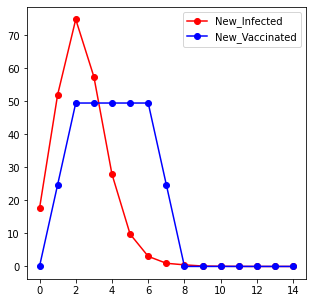

In [95]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(avg_new_infected,'ro-', label="New_Infected")
ax.plot(avg_new_vaccinated,'bo-', label="New_Vaccinated")



ax.legend()
plt.show()

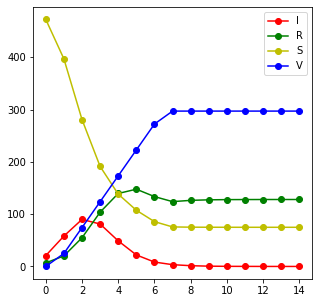

In [96]:
fig, ax = plt.subplots(figsize=(5,5))


ax.plot(avg_inf,'ro-', label="I",)
ax.plot(avg_recovered,'go-', label="R")
ax.plot(avg_subsceptible,'yo-', label="S")
ax.plot(avg_vaccinated,'bo-', label="V")


ax.legend()
plt.show()

#Problem 4

In [105]:
vacc=np.array([5,9,16,24,32,40,47,54,59,60,60,60,60,60,60,60])
I_0=np.array([1,1,3,5,9,17,32,32,17,5,2,1,0,0,0,0])
weeks=16
k=10
beta=0.3
ro=0.6
delta_k=1
delta_beta=0.1
delta_ro=0.1
nodes=934
N=10


In [106]:
def get_best_parameters(n, N, weeks, vacc, I0, k0, delta_k, beta0, delta_beta,ro0, delta_ro):

  list_k = np.array([k0 - delta_k, k0, k0 + delta_k])
  list_beta = np.array([beta0 - delta_beta, beta0, beta0 + delta_beta])
  list_ro = np.array([ro0 - delta_ro, ro0, ro0 + delta_ro])
  for i in range(3):
    if list_k[i] < 2:
    list_k[i] = 2
    if list_beta[i] > 1.0:
    list_beta[i] = 1.0
    elif list_beta[i] < 0.0:
    list_beta[i] = 0.0
    if list_ro[i] > 1.0:
    list_ro[i] = 1.0
    elif list_ro[i] < 0.0:
    list_ro[i] = 0.0
  array_sus_nodes_avg = np.empty((3, 3, 3, weeks))
  array_inf_nodes_avg = np.empty((3, 3, 3, weeks))
  array_rec_nodes_avg = np.empty((3, 3, 3, weeks))
  array_new_inf_nodes_avg = np.empty((3, 3, 3, weeks))
  num_parameters = (3, 3, 3)
  loss = np.empty(num_parameters)
  n_initial_infected = I0[0]
  for i, k in enumerate(list_k):
    for j, beta in enumerate(list_beta):
      for a, ro in enumerate(list_ro):
        G = generate_random_graph(n, k)
        sus_nodes_avg, inf_nodes_avg, rec_nodes_avg, new_inf_nodes_avg, vac_nodes, new_vac_nodes = simulate_epidemic_vacc(N, weeks, G, n, n_initial_infected, beta, ro, vacc, final_plot=False);
        array_sus_nodes_avg[i, j, a] = sus_nodes_avg
        array_inf_nodes_avg[i, j, a] = inf_nodes_avg
        array_rec_nodes_avg[i, j, a] = rec_nodes_avg
        I = new_inf_nodes_avg
        array_new_inf_nodes_avg[i, j, a] = I
        loss[i, j ,a] = np.sqrt((1 / (weeks)) * np.sum((I - I0)**2))
  
  best_indexes = np.unravel_index(np.argmin(loss), shape=num_parameters)
  best_k = list_k[best_indexes[0]]
  best_beta = list_beta[best_indexes[1]]
  best_ro = list_ro[best_indexes[2]]
  best_sus_nodes = np.array(array_sus_nodes_avg[best_indexes])
  best_inf_nodes = np.array(array_inf_nodes_avg[best_indexes])
  best_rec_nodes = np.array(array_rec_nodes_avg[best_indexes])
  best_It = np.array(array_new_inf_nodes_avg[best_indexes])      
  return loss[best_indexes], best_k, best_beta, best_ro, best_It,best_sus_nodes, best_inf_nodes, best_rec_nodes



In [107]:
def explore_parameters(n, N, weeks, vacc, I0, k0, delta_k, beta0, delta_beta, ro0, delta_ro):
  improvement = True
  best_res = None
  while improvement:
    print(f"Trying\tk: ({k0}, {delta_k})\tbeta: ({beta0}, {delta_beta})\tro:({ro0}, {delta_ro})")
    res = get_best_parameters(n, N, weeks, vacc, I0, k0, delta_k, beta0, delta_beta, ro0, delta_ro)
    loss = res[0]
    best_k = res[1]
    best_beta = res[2]
    best_ro = res[3]
    print(f"Loss = {loss}\nBest k = {best_k}")
    print(f"Best beta = {best_beta}\nBest ro = {best_ro}\n")
    if best_res is None:
      best_res = res
    if (k0, beta0, ro0) == (best_k, best_beta, best_ro):
      improvement = False
    if res[0] < best_res[0]:
      best_res = res
    elif res[0] > best_res[0]:
      improvement = False
    else:
      best_res = res
      k0, beta0, ro0 = (best_k, best_beta, best_ro)
  print("Research over.")
  return best_res

NetworkXError: ignored

In [ ]:
list_delta_k = [2, 1, 1, 1]
list_delta_beta = [0.1, 0.05, 0.025, 0.0125]
list_delta_ro = [0.1, 0.05, 0.025, 0.0125]
k0 = 10
beta0 = 0.5
ro0 = 0.6
best_res = None
for i in range(5):
  delta_k = list_delta_k[i]
  delta_beta = list_delta_beta[i]
  delta_ro = list_delta_ro[i]
  res = explore_parameters(nodes, N, weeks, vacc, I0, k0, delta_k,
  beta0, delta_beta, ro0, delta_ro)
  loss = res[0]
  k0 = res[1]
  beta0 = res[2]
  ro0 = res[3]
  if best_res is None or best_res[0] > loss:
    best_res = res
loss = best_res[0]
best_k = best_res[1]
best_beta = best_res[2]
best_ro = best_res[3]
best_It = best_res[4]
best_sus_nodes = best_res[5]
best_inf_nodes = best_res[6]
best_rec_nodes = best_res[7]